<a href="https://colab.research.google.com/github/Tclack88/DS-Unit-1-Sprint-3-Statistical-Tests-and-Experiments/blob/master/module1-statistics-probability-and-inference/LS_DS_131_Statistics_Probability_and_Inference.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>

<br></br>
<br></br>

## *Data Science Unit 1 Sprint 3 Lesson 1*

# Statistics, Probability and Inference

## Learning Objectives
* [Part 1](#p1): Normal Distribution Revisted
* [Part 2](#p2): Student's T Test
* [Part 3](#p3): Hypothesis Test & Doing it Live

## What is Descriptive Statistics?

<https://statistics.laerd.com/statistical-guides/descriptive-inferential-statistics.php>

In [0]:
import pandas as pd
df = pd.DataFrame({'a': [1,2,3,4,5], 'b': [2,4,6,8,10]})
df.head()

,a,b
0,1,2
1,2,4
2,3,6
3,4,8
4,5,10


In [0]:
# How can we quickly look at some descriptive statistics of the above dataframe?

## What is Inferential Statistics?

<https://slideplayer.com/slide/5130463/16/images/2/Statistical+Inference.jpg>

## Hypothesis Testing (T-Tests)



Ever thought about how long it takes to make a pancake? Have you ever compared the tooking time of a pancake on each eye of your stove? Is the cooking time different between the different eyes? Now, we can run an experiment and collect a sample of 1,000 pancakes on one eye and another 800 pancakes on the other eye. Assumed we used the same pan, batter, and technique on both eyes. Our average cooking times were 180 (5 std) and 178.5 (4.25 std) seconds repsectively. Now, we can tell those numbers are not identicial, but how confident are we that those numbers are practically the same? How do we know the slight difference isn't caused by some external randomness?

Yes, today's lesson will help you figure out how long to cook your pancakes (*theoretically*). Experimentation is up to you; otherwise, you have to accept my data as true. How are going to accomplish this? With probability, statistics, inference and maple syrup (optional). 

<img src="https://images.unsplash.com/photo-1541288097308-7b8e3f58c4c6?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=3300&q=80" width=400>



## Normal Distribution Revisited

What is the Normal distribution: A probability distribution of a continuous real valued random-variable. The Normal distribution properties make it useful for the *Central Limit Theorm*, because if we assume a variable follows the normal distribution, we can make certain conclusions based on probabilities.

In [0]:
import numpy as np

mu = 0 # mean
sigma = 0.1 # standard deviation

sample = np.random.normal(mu, sigma, 1000)

In [0]:
# Verify the mean of our sample
abs(mu - np.mean(sample)) < 0.01

True

In [0]:
# Verify the variance of our sample
abs(sigma - np.std(sample, ddof=1)) < 0.01

True

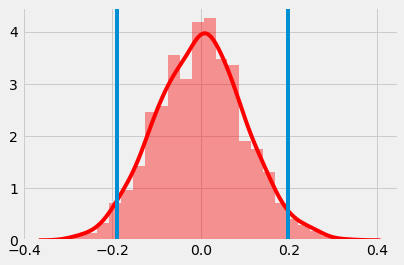

In [0]:
import seaborn as sns
from matplotlib import style

style.use('fivethirtyeight')

ax = sns.distplot(sample, color='r')
ax.axvline(np.percentile(sample,97.5),0)
ax.axvline(np.percentile(sample,2.5),0)

![The Normal Distribution](https://upload.wikimedia.org/wikipedia/commons/thumb/a/a9/Empirical_Rule.PNG/350px-Empirical_Rule.png)

# Why do we use the t-distribution in hypothesis tests?

![t-distribution-low-dof](https://lambdachops.com/img/t-distribution-low-dof.png)

![t-distribution-approximates-normal](https://github.com/ryanallredblog/ryanallredblog.github.io/blob/master/img/t-distribution-approximates-normal.png?raw=true)

### Helpful video on why we use the t-distribution

<https://www.youtube.com/watch?v=Uv6nGIgZMVw>

However, in order to understand it you'll need to understand what a z-score is:

A z-score calculates the number of standard deviations an observations lies from the population mean. The problem is that in real-world situations, we don't know what the sample mean is, so we have to turn to using the sample mean to estimate the population mean. Because the sample mean is generated from a sample and used to estimate the population mean with some level of uncertainty, it also has its own distribution a nd spread. This means that for low sample sizes both our estimates of the sample mean and sample population are not very precise, they're kind of spread out. It's this spread that makes the t-distribution wider than the normal distribution for low sample sizes. However, with the larger the sample size, the closer the t-distribution approximates the normal distribution.


## Student's T Test

>Assuming data come from a Normal distribution, the t test provides a way to test whether the sample mean (that is the mean calculated from the data) is a good estimate of the population mean. 

The derivation of the t-distribution was first published in 1908 by William Gosset while working for the Guinness Brewery in Dublin. Due to proprietary issues, he had to publish under a pseudonym, and so he used the name Student.

The t-distribution is essentially a distribution of means of normaly distributed data. When we use a t-statistic, we are  checking that a mean fails within a certain $\alpha$ probability of the mean of means.

In [0]:
t_df10 = np.random.standard_t(df=10, size=10)
t_df100 = np.random.standard_t(df=100, size=100)
t_df1000 = np.random.standard_t(df=1000, size=1000)

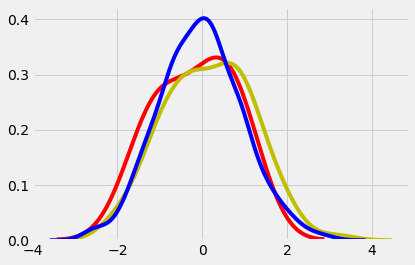

In [0]:
sns.kdeplot(t_df10, color='r');
sns.kdeplot(t_df100, color='y');
sns.kdeplot(t_df1000, color='b');

In [0]:
i = 10
for sample in [t_df10, t_df100, t_df1000]:
    print(f"t - distribution with {i} degrees of freedom")
    print("---" * 10)
    print(f"Mean: {sample.mean()}")
    print(f"Standard Deviation: {sample.std()}")
    print(f"Variance: {sample.var()}")
    i = i*10

t - distribution with 10 degrees of freedom
------------------------------
Mean: -0.31273998586964813
Standard Deviation: 1.1501190874764438
Variance: 1.3227739153776474
t - distribution with 100 degrees of freedom
------------------------------
Mean: -0.08090662415049571
Standard Deviation: 1.0383358313816349
Variance: 1.0781412987309908
t - distribution with 1000 degrees of freedom
------------------------------
Mean: 0.026011887125489363
Standard Deviation: 0.9716065366464899
Variance: 0.9440192620541868


Why is it different from normal? To better reflect the tendencies of small data and situations with unknown population standard deviation. In other words, the normal distribution is still the nice pure ideal (thanks to the central limit theorem), but the t-distribution is much more useful in many real-world situations.

## Live Lecture - let's perform and interpret a t-test

We'll generate our own data, so we can know and alter the "ground truth" that the t-test should find. We will learn about p-values and how to interpret "statistical significance" based on the output of a hypothesis test. We will also dig a bit deeper into how the test statistic is calculated based on the sample error, and visually what it looks like to have 1 or 2 "tailed" t-tests.

In [0]:
# TODO - during class, but please help!
from scipy.stats import ttest_ind, ttest_ind_from_stats, ttest_rel
import numpy as np
import seaborn as sb

In [0]:
import scipy.stats
dir(scipy.stats)

In [0]:
# Mu is used for POPULATION average
# xbar is used for SAMPLE average

# mean cooking times
xbar1 = 180
xbar2= 178.5

# sample standard eviation
s1 = 5
s2 = 4.25

# Sample size
n1 = 1000
n2 = 800

In [0]:
stove1 = np.random.normal(xbar1,s1,n1)
stove2 = np.random.normal(xbar2,s2,n2)

In [0]:
stove1

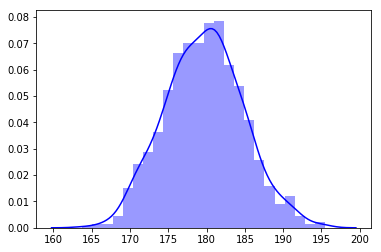

In [7]:
ax = sb.distplot(stove1,color='b')

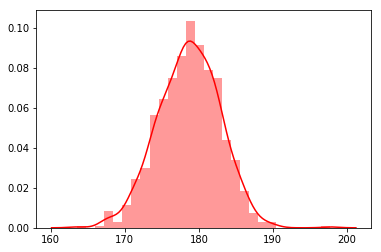

In [10]:
ax = sb.distplot(stove2,color='r')

# Now the Inferential Statistics

(Two sample T-test for means) are the sample means of these two groups of pancake cooking times different?)

- How different? (probability)


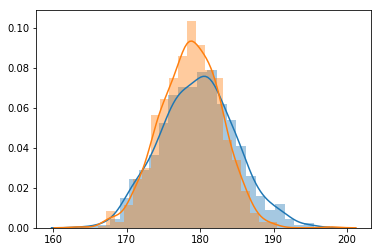

In [12]:
import matplotlib.pyplot as plt
fig,ax = plt.subplots()
for sample in (stove1,stove2):
  sb.distplot(sample)

## Two sample T-test 
1) Null hypothesis (boring hypothesis) default state

No difference in cooking times

2) Alternative Hypothesis (interesting hypothesis)

3) confidence Level (probability of seeing a true result in spite of random variability)

Typically: 95%,99%,99.9%

What does a 95% Confidence level mean? we will be tricked into thinking the wrong thing 5% of the time or thinking the right thing 95% of the time



In [13]:
ttest_ind(stove1,stove2)

Ttest_indResult(statistic=4.576963017761369, pvalue=5.040835681417927e-06)

4) t-statisic: 4.6

5) p-value: .00000504

p-value that is < 1-confidence level which in our case is .05. then I will reject the null hypothesis

we never "accept" the null hypothesis, we only "reject", or "fail to reject" the null hypothesis

---
Conclusion:

Due to our test reslting in a t-statistic of 4.6 and having a p-value of 5.04E-6, we reject the null hypothesis that the two stove burners cook pancakes cook pancakes at a similar rate, and suggest the alternative hypothesis that the pancake cooking tiems are different.

---
(if .0499999 we reject the null hypothesis

if .05000001 we fail to reject the null hypothesis)

In [14]:
from scipy.stats import t
# Looks up a t-statistic for a confidence level and degree of freedom
t.ppf(.95,20)

1.7247182429207857

## Getting started on the assignment
(example of both 1 and 2-sample t-tests)

In [0]:
import pandas as pd

In [22]:
df = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/voting-records/house-votes-84.data",
                          names=['party','handicapped-infants','water-project',
                          'budget','physician-fee-freeze', 'el-salvador-aid',
                          'religious-groups','anti-satellite-ban',
                          'aid-to-contras','mx-missile','immigration',
                          'synfuels', 'education', 'right-to-sue','crime','duty-free',
                          'south-africa'])
df = df.replace({'n':0,'y':1,'?':np.nan})
df.head()

,party,handicapped-infants,water-project,budget,physician-fee-freeze,el-salvador-aid,religious-groups,anti-satellite-ban,aid-to-contras,mx-missile,immigration,synfuels,education,right-to-sue,crime,duty-free,south-africa
0,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,0.0,1.0
1,republican,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,NaN
2,democrat,NaN,1.0,1.0,NaN,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0
3,democrat,0.0,1.0,1.0,0.0,NaN,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
4,democrat,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,NaN,1.0,1.0,1.0,1.0


In [0]:
dem = df[df['party'] == 'democrat']
rep = df[df['party'] == 'republican']

In [0]:
from scipy.stats import ttest_1samp

In [24]:
df.isnull().sum()

party                     0
handicapped-infants      12
water-project            48
budget                   11
physician-fee-freeze     11
el-salvador-aid          15
religious-groups         11
anti-satellite-ban       14
aid-to-contras           15
mx-missile               22
immigration               7
synfuels                 21
education                31
right-to-sue             25
crime                    17
duty-free                28
south-africa            104
dtype: int64

In [25]:
rep['budget'].mean()

0.13414634146341464

In [27]:
# sample size (length of the column, excluding NaN values)
len(rep['budget']) - rep['budget'].isnull().sum()

164

In [30]:
# Run 1-sample t-test providing sample and null hypothesis
# pass nan_policy='omit' any time you nave NaN values in a column
ttest_1samp(rep['budget'], 0, nan_policy='omit')

Ttest_1sampResult(statistic=5.02528816355446, pvalue=1.3107521045196396e-06)

1) Null Hypothesis:

In 1-sample t-tests YOU GET TO CHOOSE YOUR NULL HYPOTHESIS

H0 : 0.0 - There is ZERO republican support for this bill

2) Alternative Hypothesis

$H_a$ :  $\bar x \ne 0$  - There is non-zero support for the budget bill among repulbicans.

3) Confidence Level: 95% or .95

4) t-statistic: 5.025

5) p-value of .00000131

# Resources

- https://homepage.divms.uiowa.edu/~mbognar/applets/t.html
- https://rpsychologist.com/d3/tdist/
- https://gallery.shinyapps.io/tdist/
- https://en.wikipedia.org/wiki/Standard_deviation#Sample_standard_deviation_of_metabolic_rate_of_northern_fulmars
- https://www.khanacademy.org/math/ap-statistics/two-sample-inference/two-sample-t-test-means/v/two-sample-t-test-for-difference-of-means